# Decision Trees and Ensemble Learning

## Credit Risk Scoring

* Build a model, that the bank can use to take a decision on whether they give a credit or not
* The model gives the risk, that a customer won't pay back the credit ("Risk of Defaulting")
![model](Screenshot_1.png)

## Setup

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data Cleaning and Preparation
* Download the data
* Re-encoding categorical variables
* Doing the train / validation / test split

In [2]:
# !wget -P ../data/ https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

In [3]:
!head ../data/CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [4]:
# read the data
df = pd.read_csv("../data/CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


* lower the capitals of the column names
* replace numbers with strings in categorical values
* replace missing values

In [5]:
# lower the capitals of the column names
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [7]:
# replace numbers with strings in categorical values
# define the map dictionaries
status_values = {
    1: "ok", 
    2: "default", 
    0: "unk"
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}


# map the values of the dictionaries
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
# replace missing values
# have a look at some statistical values of the numerical values
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


* We see that ```Income```, ```assets``` and ```debt``` have max value ```99999999.0```
* Replace this number with  ```nan```

In [10]:
for c in ["income", "assets", "debt"]:
    df[c] = df[c].replace(to_replace=99999999, value= np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
# look at the status varianle again
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

* The row with status = 1 (unknown) is useless for us
* We will remove it

In [13]:
df = df[df.status != "unk"].reset_index(drop=True)

In [14]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [15]:
# Do train / validation / test split
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

* define y as status
 * set the default values to 1 and the ok values to 0

In [17]:
y_train = (df_train.status == "default").astype(int)
y_val = (df_val.status == "default").astype(int)
y_test = (df_test.status == "default").astype(int)

In [18]:
# remove status column from dataframe
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [19]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


## Decision Trees

* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

A Decision Tree is a data structure, that looks like this
![decisoin tree](Screenshot_2.png)

* A decision tree is a sequence of if-else-then 
* A simple example
![example](Screenshot_3.png)

In [20]:
def asses_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [21]:
# take first entry as example
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [22]:
asses_risk(xi)

'ok'

* This if-then-eñse rules can be learned from the data

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [24]:
train_dicts = df_train.fillna(0).to_dict(orient="records")
val_dicts = df_val.fillna(0).to_dict(orient="records")
train_dicts[:2]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330}]

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [26]:
# train the decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# test the decision tree
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:,1]

In [28]:
roc_auc_score(y_val, y_pred)

0.6456431183550896

* The score is not very high, look at the roc_auc_score for the train set

In [29]:
y_pred_train = dt.predict_proba(X_train)[:,1]

In [30]:
roc_auc_score(y_train, y_pred_train)

1.0

* Our model is overfitting
* It memorizes the training data, but does not generalize
* This happens, because we did not restrict the tree, but it can learn very specific conditions
* One possibility to avoid this is to restrict the depth

In [31]:
# retrain the model, with max depth restriced to 3
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]
ras = roc_auc_score(y_val, y_pred)
print(f"roc_auc_score on validation data: {ras}")

y_pred_train = dt.predict_proba(X_train)[:,1]
ras_train = roc_auc_score(y_train, y_pred_train)
print(f"roc_auc_score on training data: {ras_train}")

roc_auc_score on validation data: 0.7389079944782155
roc_auc_score on training data: 0.7761016984958594


* The performance of our model on validation data is much better
* Visualize the tree

In [32]:
from sklearn.tree import export_text

print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_27 <= 6.50
|   |   |--- feature_1 <= 862.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  862.50
|   |   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- feature_12 <= 103.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  103.50
|   |   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_12 <= 74.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  74.50
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_2 <= 8750.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  8750.00
|   |   |   |--- class: 0



* To know what the features are use ```dv.get_feature_names()```

In [33]:
dv.get_feature_names()

/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [34]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## Decision Tree Algorithm Learning
* Finding the best plit for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm



In [35]:
# simple dataset
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

# transform to dataframe
df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


 * Train a decision tree using the "assets" column
 * We then have a model that decides the status only on the value of "assets"
 * When assets > threshold, the default status will be ok, else it will be default
 * We look for the best threshold
 * I.e. we split the dataset in two sets 
     * 1: assets > threshold
     * 2: assets >= threshold
 * What are possible values for the threshold?
     * Look at the dataset, sorted for values of asset

In [36]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


* We could then split the data at ```asset = 2000```, ```asset = 3000```, ```assets = 4000```, ```assets = 5000``` or , ```assets = 8000```.
* Other values would either lead to the same results or to an empty set

In [37]:
from IPython.display import display

In [38]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

for T in Ts:
    
    print(f"threshold: {T}")
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

threshold: 0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

threshold: 2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

threshold: 3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

threshold: 4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

threshold: 5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

threshold: 8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



* Now we want to find the best split
    * To evaluate the split, we can look at the "Misclassification Rate = Impurity":
        * For df_left predict every sample as "default"
        * For df_right predict every sample as "ok"
        * Count how many errors are made on each side
        * This is the misclassification rate (e.g. T=4, misclassification rate left: 1/4 = 25%, misclassification rate right: 1/4 = 24%) 
        * Take the (weighted) average of both misclassification rate (For sake of simplicity in this example we will take the normal average)

T   |  Decision Left | Impurity Left | decision Right | Impurity Right | Average Impurity
:--:|:--------------:|:-------------:|:--------------:|:--------------:|:----------------:
0   | Default        | 0%            | OK             | 93%            | 21%   
2000| Default        | 0%            | OK             | 33%            | 16% 
3000| Default        | 0%            | OK             | 20%            | 10%
4000| Default        | 25%           | OK             | 25%            | 25%
5000| Default        | 50%           | OK             | 50%            | 50%
8000| Default        | 42%           | OK             | 0%             | 21%  

* Threshold = 3000 gives the lowest impurity
* I.e., this is the best split

In [39]:
# Add another feature to the data
# simple dataset
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

# transform to dataframe
df_example = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


* Split the "debt" feature

In [40]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


* Possible thresholds: ```debt = 500```, ```debt = 1000```, ```debt = 2000```
* Do the same as before, but generalize a bit

In [41]:
Ts = [500, 1000, 2000]

In [42]:
# more general, put all thresholds in a dictionary
thresholds = {
    "assets": [0, 2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000]
} 

for feature, Ts in thresholds.items():
    print(20*'#')
    print(feature)
    for T in Ts:
    
        print(f"threshold: {T}")
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()

####################
assets
threshold: 0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

threshold: 3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

threshold: 4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

threshold: 5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

threshold: 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

####################
debt
threshold: 500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

threshold: 1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64



T   |  Decision Left | Impurity Left | decision Right | Impurity Right | Average Impurity
:--:|:--------------:|:-------------:|:--------------:|:--------------:|:----------------:
500 | OK             | 0%            | Default        | 43%            | 21%   
1000| OK             | 33%           | Default        | 0%             | 16% 
2000| OK             | 43%           | Default        | 0%             | 21%

* We see that "debt" is not as good to split the data as "assets", assets = 3000 still is the best split 

![split algorthm](Screenshot_4.png)

* Repeat this process for each split with the remaining features
* We need some stopping criteria, when we stop splitting:
    * Split is already pure
    * Tree reached depth limit
    * Group to small to split
    
* Documentation: https://scikit-learn.org/stable/modules/tree.html
* There are other criteria to find the best split, e.g. Giny, Entropy

![algorithm summary](Screenshot_5.png)

## Decision Trees Parameter Tuning

* selecting ```max_depth```: The maximal depth of the tree
* selecting ```min_samples_leaf```: This is the minimum number of samples in the leaf node to continue splitting
* Parameter tuning means, select paramters, such that the chosen metric on the validation data is maximized, in this case the metric is auc

In [43]:
# first max_depth
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"depth: {str(d):4s}, auc: {auc:.3f}")

depth: 1   , auc: 0.606
depth: 2   , auc: 0.669
depth: 3   , auc: 0.739
depth: 4   , auc: 0.761
depth: 5   , auc: 0.766
depth: 6   , auc: 0.748
depth: 10  , auc: 0.698
depth: 15  , auc: 0.654
depth: 20  , auc: 0.641
depth: None, auc: 0.652


* Best depths values are between 4, 5 and 6
* Look at min_samples_leaf for these depths

In [44]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"depth: {str(d):4s}, min_sample_leaf: {s:4}, auc: {auc:.3f}")

depth: 4   , min_sample_leaf:    1, auc: 0.761
depth: 4   , min_sample_leaf:    2, auc: 0.761
depth: 4   , min_sample_leaf:    5, auc: 0.761
depth: 4   , min_sample_leaf:   10, auc: 0.761
depth: 4   , min_sample_leaf:   15, auc: 0.764
depth: 4   , min_sample_leaf:   20, auc: 0.761
depth: 4   , min_sample_leaf:  100, auc: 0.756
depth: 4   , min_sample_leaf:  200, auc: 0.747
depth: 4   , min_sample_leaf:  500, auc: 0.680
depth: 5   , min_sample_leaf:    1, auc: 0.767
depth: 5   , min_sample_leaf:    2, auc: 0.766
depth: 5   , min_sample_leaf:    5, auc: 0.768
depth: 5   , min_sample_leaf:   10, auc: 0.762
depth: 5   , min_sample_leaf:   15, auc: 0.772
depth: 5   , min_sample_leaf:   20, auc: 0.774
depth: 5   , min_sample_leaf:  100, auc: 0.763
depth: 5   , min_sample_leaf:  200, auc: 0.759
depth: 5   , min_sample_leaf:  500, auc: 0.680
depth: 6   , min_sample_leaf:    1, auc: 0.749
depth: 6   , min_sample_leaf:    2, auc: 0.763
depth: 6   , min_sample_leaf:    5, auc: 0.762
depth: 6   , 

* For easer readability put the results in a DataFrame

In [45]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [46]:
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [47]:
df_scores.sort_values("auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785250
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.774028
23,6,20,0.773337


* Look at this table in a different way: columns: max_depth, rows=min_samples_leaf, values=auc

In [48]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns=["max_depth"], values=["auc"])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.750
2                 0.761  0.767  0.758
5                 0.761  0.768  0.759
10                0.761  0.762  0.778
15                0.764  0.773  0.785
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

* Transform this table into a heat map

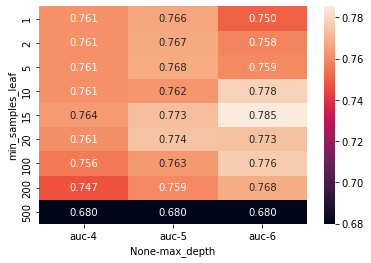

In [49]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f");

* Train the final Decision Tree

In [50]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensembles and Random Forests
* Board of experts
    * The idea of a Random Foret is to have several Decision Trees and let each decide by its own, we then take the average of there decisions if we have a regression problem or the majority class if we have a classification problem
    * Why Random? If we use the same parameters for each tree, all would be the same, and then the result of each would be the same
    * In a Random Forest each tree gets a random subset of features, e.g. we have a total of 10 features, but each tree gets only 7 of them and these are different for each tree.
* Ensembling models
* Random forest - ensembling decision trees
![Random Forest](Screenshot_6.png)
* Tuning a random forest

In [51]:
# Use sklearn to train a random forest
from sklearn.ensemble import RandomForestClassifier 

In [52]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [53]:
y_pred = rf.predict_proba(X_val)[:,1]

In [54]:
roc_auc_score(y_val, y_pred)

0.7859824174759633

In [55]:
# apply the model to an example
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

* The Random Forest gives different results each time we train again, because of the random features in it
* To avoit this we can set a random seed

In [56]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

* Try different number of estimators

In [57]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

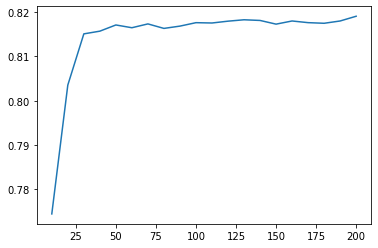

In [58]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])
plt.plot(df_scores.n_estimators, df_scores.auc);

* Performance is improving util ~50 trees
* We can now tune the Random Forest, the parameters we tune are the same as in Decision Trees as the Random Forest constits of Decision Trees

In [59]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [60]:
columns=["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


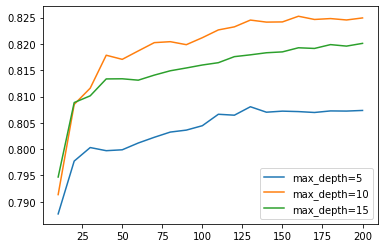

In [61]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
plt.legend();

* We can see that max_depth=10 seems to be the best

In [62]:
scores = []
max_depth=10

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [63]:
columns=["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


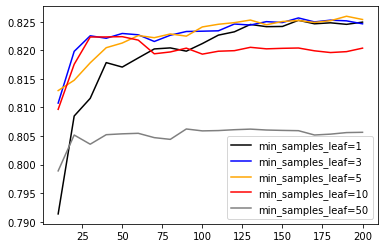

In [64]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_samples_leaf={s}", color=col)
plt.legend();

* The best values for min_samples_leaf are 1, 3, 5, in this example we set min_samples_leaf=3

In [65]:
min_samples_leaf = 3

In [66]:
# Train Random Forest with these values
rf = RandomForestClassifier(n_estimators=100, 
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

* Other useful parameters:
    * ```max_features```: Sets how many features each tree gets
    * ```bootstrap```: Another way of randomization on the row level
    * ```n_jobs```: To parallize the training of the Desicion Trees
    * Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Gradient Boosing and XGBoost
* Gradient boosint vs. random forest
    * Gradient Boosing: A different way of combining several Decision Trees
    * First make a prediction with one model, then train a second model correcting the errors of the irst one, etc.
    * We will use XGBoost in this course
    
![boosting](Screenshot_6.png)
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing XGBoost's monitoring output

In [67]:
# install XGBoost
!pip install xgboost

In [68]:
import xgboost as xgb

* Wrap the training data in a special data structure
* For training we need to define the parameters: https://xgboost.readthedocs.io/en/stable/parameter.html
    * Important parameters: ```eta```: learning rate, ̣```max_depth```: size of the trees, ```min_child_weight```: equivalent to min_samples_weight
    * ```objective```: defines the task, in our case we have a binary classification problem
    * ```nthread```: To parallize training
    * Set the random seed, with ```seed```
    * Set ```verbosity``` to 1, to see warnings, while training

In [107]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [108]:
# num_boost_round=200 is the number of trees we let grow
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

[07:34:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [109]:
y_pred = model.predict(dval)

In [110]:
roc_auc_score(y_val, y_pred)

0.8003166549611296

* The performance of the model is depending on ```num_boost_round```
* We can evaluate the model after each round by defining a "watchlist"

In [111]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [112]:
# num_boost_round=200 is the number of trees we let grow
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.86300	val-auc:0.76818
[1]	train-auc:0.88485	val-auc:0.79410
[2]	train-auc:0.89923	val-auc:0.80017
[3]	train-auc:0.90951	val-auc:0.80886
[4]	train-auc:0.91967	val-auc:0.80414
[5]	train-auc:0.92863	val-auc:0.80606
[6]	train-auc:0.93385	val-auc:0.80949
[7]	train-auc:0.93880	val-auc:0.81101
[8]	train-auc:0.94150	val-auc:0.81445
[9]	train-auc:0.94581	val-auc:0.81527
[10]	train-auc:0.95002	val-auc:0.81558
[11]	train-auc:0.95342	val-auc:0.81678
[12]	train-auc:0.95554	val-auc:0.81821
[13]	train-auc:0.95985	val-auc:0.81677
[14]	train-auc:0.96176	val-auc:0.81801
[15]	train-auc:0.96558	val-auc:0.81680
[16]	train-auc:0.96741	val-auc:0.81807
[17]	train-auc:0.96981	val-auc:0.81808
[18]	train-auc:0.97083	val-auc:0.81901
[19]	train-auc:0.97252	val-auc:0.81732
[20]	train-auc:0.97316	val-auc:0.81775
[21]	train-auc:0.97469	val-auc:0.81765
[22]	train-auc:0.97678	val-auc:0.81865
[23]	train-auc:0.97925	val-auc:0.81786
[24]	train-auc:0.98104	val-auc:0.81937
[25]	train-auc:0.98174	val-auc:0.81

* This trains and evaluates 200 models
* The model is overfitting
* To not evaluate every step, we can set ```verbose_eval```

In [113]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81788
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99991	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99999	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

* It is quite difficult to extract this information from xgboost and plot it
* A possibility is to use the jupyter-notebook magic command "capture" to capture the output of a cell

In [114]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [115]:
print(output.stdout)

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81788
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99991	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99999	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

In [78]:
s = output.stdout

* Now we can use this string and read out the numbers we need

In [116]:
line = s.split("\n")[0]
line

'[0]\ttrain-auc:0.86300\tval-auc:0.76818'

In [117]:
line.split("\t")

['[0]', 'train-auc:0.86300', 'val-auc:0.76818']

In [118]:
num_iter, train_auc, val_auc = line.split("\t")
num_iter, train_auc, val_auc 

('[0]', 'train-auc:0.86300', 'val-auc:0.76818')

In [119]:
int(num_iter.strip("[]"))

0

In [120]:
float(train_auc.split(":")[1])

0.863

In [121]:
float(val_auc.split(":")[1])

0.76818

* Now generalize this process to every line

In [122]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [123]:
df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775


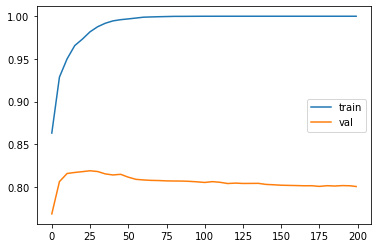

In [124]:
# plot the results
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend();

* We can see that we are overfitting

## XGBoost Parameter Tuning
* Tuning the following parameters
    * ```eta```: learning rate, stepsize
        * Defines how much weight the next model has
        * E.g. eta = 1: only the next model's predictions are used, eta 0 0.3; 30% of the next model's predictions are used
    * ```max_depth```
    * ```min_child_weight```

In [148]:
scores = {}

In [174]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

* Try different paramters

In [168]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)

In [169]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1', 'eta=0.1', 'eta=0.05', 'eta=0.01', 'eta=1.0'])

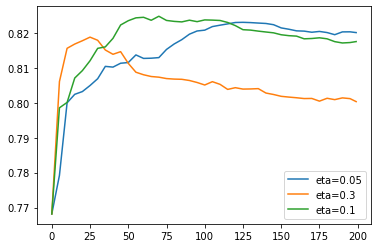

In [173]:
etas = ["eta=0.05", "eta=0.3", "eta=0.1"]
for eta in etas:
    df_score = scores[eta] 
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

* ```eta=0.1``` seems to be the best
* Take this now as a baseline model to optimize on ```max_depth```

In [180]:
scores = {}

In [190]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 10,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [191]:
key = f"max_depth={xgb_params['max_depth']}"
scores[key] = parse_xgb_output(output)

In [192]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

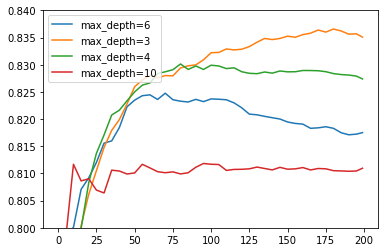

In [195]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.ylim(0.8,0.84)
plt.legend()

* ```max_depth = 3``` keeps growing the longest, keep this as baseline

In [203]:
scores = {}

In [210]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [211]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
scores[key] = parse_xgb_output(output)

In [212]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

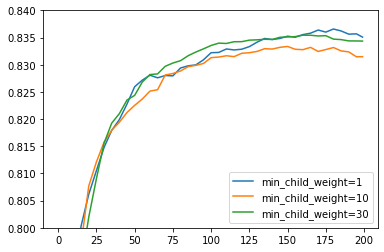

In [213]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.ylim(0.8,0.84)
plt.legend()

* The values are very close, we will stay with ```min_child_weight=1```
* Now we will train this model and choose the number of iteratins to 175

In [215]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=175)

* Documentation: https://xgboost.readthedocs.io/en/stable/
* Other useful parameters:
    * ```subsample``` (How many rows for each tree) and ```colsample_bytree``` (How many features for each tree)
        * Both between 0 and 1
    * ```lambda``` and ```alpha```

## Selecting the final Model
* Choosing between XGBoost, Random Forest and Decision Tree
* Training the final model
* Saving the model


In [221]:
# The best decision tree model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [222]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7850954203095104

In [218]:
# The best random forest
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [223]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [219]:
# The best XGBoost
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=175)

In [227]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8354877576227264

* XGBoost is the best model
* Now train the final model and use the entire dataset

In [230]:
df_full_train = df_full_train.reset_index(drop=True)

In [233]:
y_full_train = (df_full_train["status"] == "default").astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [234]:
del df_full_train["status"]

In [251]:
dicts_full_train = df_full_train.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [252]:
dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [261]:
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names_out())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [262]:
model = xgb.train(xgb_params, dfull_train, 
                  num_boost_round=175)

In [263]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8302929964322369

* The auc score is similar to the auc score on the train set
* Our model did not overfit
* XGBoost is often very good on this type of data (tabular data), downsie: more difficult to tune, because it  has more paramters

## Summary
* Decision Trees learn if-then-else rules from the data
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group
* Random Forests are a way of combining multiple decision trees. It shoud have a diverse set of models to make good predictions
* Gradient boosting trains models sequentially, each model tries to fix the errors of the previous one. XGBoost is an implementation of gradient boosting.

## Explore More

* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check max_features and bootstrap.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in ExtraTreesClassifier. Try it for this project.
* XGBoost can deal with NAs - we don't have to do fillna for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: subsample and colsample_bytree.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for random forest (it's the same for plain decision trees) and for xgboost
* Trees can also be used for solving the regression problems: check DecisionTreeRegressor, RandomForestRegressor and the objective=reg:squarederror parameter for XGBoost.
